# Navie Bayes

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m

In [282]:
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\dataset\\Loan Prediction\\train.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [283]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


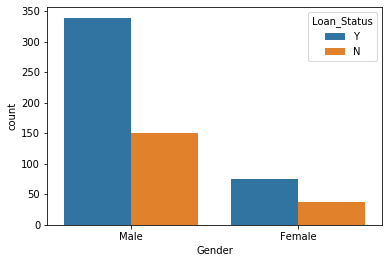

In [284]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

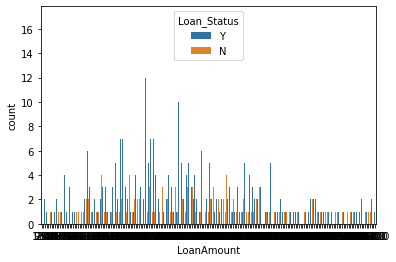

In [285]:
sns.countplot(x='LoanAmount',hue='Loan_Status',data=data)

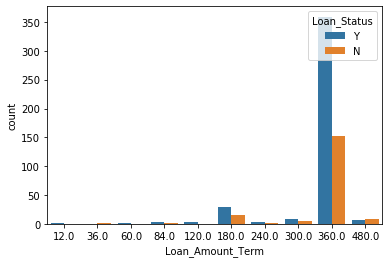

In [286]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=data)

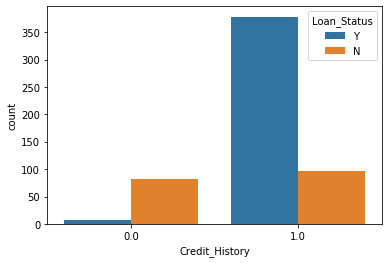

In [287]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)

In [288]:
# the features with type object in the train data:

objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [289]:
# Convert Categorial data into categorial value by using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    data[i] = le.fit_transform(data[i].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB
None


In [290]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [291]:
data.columns[data.isna().any()]

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')

In [292]:
data.LoanAmount[:10]

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
5    267.0
6     95.0
7    158.0
8    168.0
9    349.0
Name: LoanAmount, dtype: float64

In [293]:
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())
data.Credit_History=data.Credit_History.fillna(data.Credit_History.mean())

In [294]:
data.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

# Data Visulazation

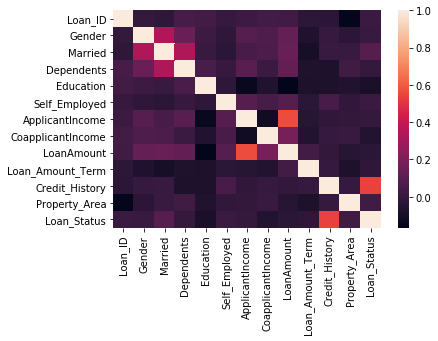

In [295]:
# Showing the correlations of features with the target.
sns.heatmap(data.corr())

# Independent and Dependent Variabels 

In [296]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1].values.reshape(-1,1)

# Train Test split

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=300)
print("X-train:",X_train.shape)
print("Y-train:",y_train.shape)
print("Y-test:",X_test.shape)
print("Y-test:",y_test.shape)

X-train: (429, 12)
Y-train: (429, 1)
Y-test: (185, 12)
Y-test: (185, 1)


# Model Fitting

In [298]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model_sk= GaussianNB()
#Train the model using the training sets
model_sk.fit(X_train,y_train)

#Predict the  response for test dataset
y_pred=model_sk.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Accuracy

In [299]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#from sklearn.metrics import confusion_matrix,classification_reports,accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred

Accuracy: 0.8324324324324325


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0])

# Train.Csv

In [300]:
test_data = pd.read_csv("C:\\Users\\Admin\\Desktop\\dataset\\Loan Prediction\\test.csv")
test_data1=test_data.copy()
test1=test_data

In [301]:
#test1.drop(["Married","Dependents","Education","Self_Employed"],axis='columns',inplace=True)
#test1.head(5)

In [302]:
# the features with type object in the train data:

objList = test1.select_dtypes(include = "object").columns
print (objList)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [303]:
# Convert Categorial data into categorial value by using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    test1[i] = le.fit_transform(test1[i].astype(str))

print (test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int32  
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(7), int64(2)
memory usage: 24.5 KB
None


In [304]:
test1.columns[test1.isna().any()]

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')

In [305]:
test1.Gender=test1.Gender.fillna(test1.Gender.mean())
test1.LoanAmount=test1.LoanAmount.fillna(test1.LoanAmount.mean())
test1.Loan_Amount_Term=test1.Loan_Amount_Term.fillna(test1.Loan_Amount_Term.mean())
test1.Credit_History=test1.Credit_History.fillna(test1.Credit_History.mean())

In [306]:
test1.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

# Model Prediction

In [307]:
#Create a Gaussian Classifier
model_sk= GaussianNB()
#Train the model using the training sets
model_sk.fit(X_train,y_train)
# predict the target on the test dataset
predict_test = model_sk.predict(test1)

print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [308]:
predict_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [309]:
model_sk.predict_proba(test1[:10])

array([[0.09730495, 0.90269505],
       [0.0869443 , 0.9130557 ],
       [0.08401951, 0.91598049],
       [0.13544992, 0.86455008],
       [0.18599139, 0.81400861],
       [0.14543368, 0.85456632],
       [0.15202013, 0.84797987],
       [0.99596513, 0.00403487],
       [0.03478921, 0.96521079],
       [0.17536891, 0.82463109]])

# Submission File

In [262]:
y_pred=pd.Series(predict_test)
b=y_pred.map({0:"N",1:"Y"})


In [263]:
a=test_data1["Loan_ID"]

In [264]:
submission=pd.DataFrame({"Loan_ID":a,"Loan_Status":b})
submission.to_csv("gaussian.csv",index=False)

## Random Forest Algorithm

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
pred_forest=forest.predict(X_test)
print(pred_forest)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0]


In [313]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#from sklearn.metrics import confusion_matrix,classification_reports,accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, pred_forest))


Accuracy: 0.827027027027027


# Prediction on Test.csv

In [315]:
forest_test=RandomForestClassifier()
forest_test.fit(X_train,y_train)
pred_forest=forest_test.predict(test1)
print(pred_forest)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


# Submission File

In [317]:
a=test_data1["Loan_ID"]
y_pred=pd.Series(pred_forest)
b=y_pred.map({0:"N",1:"Y"})


In [318]:
submission=pd.DataFrame({"Loan_ID":a,"Loan_Status":b})
submission.to_csv("randomforest.csv",index=False)